In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')
model.allocate_tensors()

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [35]:
counter=0
stage=''
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    image = frame.copy()
    image = tf.image.resize_with_pad(np.expand_dims(image, axis=0), 192,192)
    in_image = tf.cast(image, dtype=tf.float32)
    
    in_details = model.get_input_details()
    out_details = model.get_output_details()
    
    model.set_tensor(in_details[0]['index'], np.array(in_image))
    model.invoke()
    keypoints = model.get_tensor(out_details[0]['index'])
    #print(keypoints)
    
    rightshoulder=keypoints[0][0][6]
    rightshoulder_c=np.array(rightshoulder[:2]*[480,640]).astype(int)
    rightelbow=keypoints[0][0][8]
    rightelbow_c=np.array(rightelbow[:2]*[480,640]).astype(int)                           
    rightwrist=keypoints[0][0][10]
    rightwrist_c=np.array(rightwrist[:2]*[480,640]).astype(int)
    
    
   # if(rightshoulder[2]<0.4 or rightelbow[2]<0.4 or rightwrist[2]<0.4):
    #    print("Your hand is not visible clearly")
    #    continue
    4
    angle=calculate_angle(rightshoulder_c,rightelbow_c,rightwrist_c)
 #   print(rightshoulder_c)
  #  print(rightelbow_c)
  #  print(rightwrist_c)
   # print(angle)
    
    
    cv2.putText(frame, str(angle),
                           tuple(rightelbow_c),
                           cv2.FONT_ITALIC, 2, (125, 242, 245), 1,cv2.LINE_AA)
            
            # Curl counter logicq
    if angle > 160:
        stage = "down"
    if angle < 30 and stage =='down':
        stage="up"
        counter +=1
        print("No.of curls are",counter)
        
        
    
    cv2.rectangle(frame, (0,0), (225,73), (245,117,16), -1)
        
       
    cv2.putText(frame, str(counter), 
                    (10,60), 
                    cv2.FONT_ITALIC, 2, (0,255,255), 2, cv2.LINE_AA)
        
        # Stage data
    cv2.putText(frame, 'Stage', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
    cv2.putText(frame, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    
    draw_connections(frame, keypoints, EDGES, 0.2)
    draw_keypoints(frame, keypoints, 0.2)
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

No.of curls are 1
No.of curls are 2
No.of curls are 3
No.of curls are 4
No.of curls are 5
No.of curls are 6
No.of curls are 7
No.of curls are 8


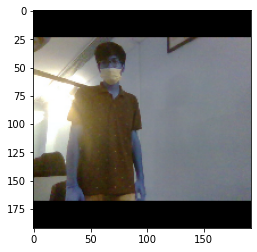

In [33]:
plt.imshow(tf.cast(np.squeeze(image), dtype=tf.int32))

In [12]:
img = frame.copy()

In [13]:
img.shape

(480, 640, 3)

In [14]:
model.get_input_details()

[{'name': 'serving_default_input:0',
  'index': 0,
  'shape': array([  1, 192, 192,   3]),
  'shape_signature': array([  1, 192, 192,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [15]:
model.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3]),
  'shape_signature': array([ 1,  1, 17,  3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [16]:
model.get_tensor(model.get_output_details()[0]['index'])

array([[[[0.33563852, 0.4918412 , 0.6013999 ],
         [0.27699625, 0.53435105, 0.29148144],
         [0.28251183, 0.44304937, 0.4752282 ],
         [0.29927588, 0.5901612 , 0.591939  ],
         [0.29590386, 0.38014507, 0.6551827 ],
         [0.48948607, 0.7017464 , 0.68989825],
         [0.5230725 , 0.27884543, 0.60958445],
         [0.7827147 , 0.8914031 , 0.4876485 ],
         [0.8648485 , 0.24485788, 0.32038832],
         [0.8178784 , 0.8858621 , 0.06766882],
         [0.87350154, 0.28361183, 0.05250168],
         [0.93995637, 0.6879045 , 0.04860159],
         [0.9658277 , 0.40127382, 0.0224943 ],
         [0.84900236, 0.92112637, 0.06929153],
         [0.8356112 , 0.26262954, 0.02063032],
         [0.87454265, 0.9394624 , 0.02284241],
         [0.84174293, 0.02700099, 0.02180329]]]], dtype=float32)

In [17]:
keypoints[0][0]

array([[0.33563852, 0.4918412 , 0.6013999 ],
       [0.27699625, 0.53435105, 0.29148144],
       [0.28251183, 0.44304937, 0.4752282 ],
       [0.29927588, 0.5901612 , 0.591939  ],
       [0.29590386, 0.38014507, 0.6551827 ],
       [0.48948607, 0.7017464 , 0.68989825],
       [0.5230725 , 0.27884543, 0.60958445],
       [0.7827147 , 0.8914031 , 0.4876485 ],
       [0.8648485 , 0.24485788, 0.32038832],
       [0.8178784 , 0.8858621 , 0.06766882],
       [0.87350154, 0.28361183, 0.05250168],
       [0.93995637, 0.6879045 , 0.04860159],
       [0.9658277 , 0.40127382, 0.0224943 ],
       [0.84900236, 0.92112637, 0.06929153],
       [0.8356112 , 0.26262954, 0.02063032],
       [0.87454265, 0.9394624 , 0.02284241],
       [0.84174293, 0.02700099, 0.02180329]], dtype=float32)

In [18]:
keypoints.shape

(1, 1, 17, 3)

In [19]:
righteye = keypoints[0][0][2]
righteye_c=np.array(righteye[:2]*[480,640]).astype(int)
leftelbow = keypoints[0][0][7]
print(righteye)
print('right eye',righteye_c)

[0.28251183 0.44304937 0.4752282 ]
right eye [135 283]


In [20]:
shaped = np.squeeze(np.multiply(model.get_tensor(model.get_output_details()[0]['index']), [480,640,1]))
shaped

array([[1.61106491e+02, 3.14778366e+02, 6.01399899e-01],
       [1.32958202e+02, 3.41984673e+02, 2.91481435e-01],
       [1.35605679e+02, 2.83551598e+02, 4.75228190e-01],
       [1.43652420e+02, 3.77703171e+02, 5.91938972e-01],
       [1.42033854e+02, 2.43292847e+02, 6.55182719e-01],
       [2.34953313e+02, 4.49117699e+02, 6.89898252e-01],
       [2.51074791e+02, 1.78461075e+02, 6.09584451e-01],
       [3.75703068e+02, 5.70497971e+02, 4.87648487e-01],
       [4.15127277e+02, 1.56709042e+02, 3.20388317e-01],
       [3.92581644e+02, 5.66951752e+02, 6.76688179e-02],
       [4.19280739e+02, 1.81511574e+02, 5.25016822e-02],
       [4.51179056e+02, 4.40258865e+02, 4.86015901e-02],
       [4.63597298e+02, 2.56815243e+02, 2.24942993e-02],
       [4.07521133e+02, 5.89520874e+02, 6.92915320e-02],
       [4.01093388e+02, 1.68082905e+02, 2.06303187e-02],
       [4.19780474e+02, 6.01255951e+02, 2.28424110e-02],
       [4.04036608e+02, 1.72806346e+01, 2.18032897e-02]])

In [21]:
for i in shaped:
    y, x, conf = i
    print(int(y), int(x), conf)

161 314 0.6013998985290527
132 341 0.2914814352989197
135 283 0.4752281904220581
143 377 0.5919389724731445
142 243 0.6551827192306519
234 449 0.6898982524871826
251 178 0.6095844507217407
375 570 0.48764848709106445
415 156 0.3203883171081543
392 566 0.06766881793737411
419 181 0.05250168219208717
451 440 0.04860159009695053
463 256 0.022494299337267876
407 589 0.06929153203964233
401 168 0.02063031867146492
419 601 0.0228424109518528
404 17 0.021803289651870728


In [22]:
def draw_keypoints(frame, keypoints, threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for i in shaped:
        y, x, conf = i
        if conf > threshold:
            cv2.circle(frame, (int(x), int(y)), 4, (0,255,255), -1) 

In [5]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [37]:
shaped[0], shaped[1]

(array([294.90077019, 286.57598495,   0.77177668]),
 array([275.12403488, 307.74776459,   0.46545959]))

In [23]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(341, 132)
(283, 135)
(377, 143)
(243, 142)
(449, 234)
(178, 251)
(570, 375)
(566, 392)
(156, 415)
(181, 419)
(178, 251)
(440, 451)
(256, 463)
(256, 463)
(589, 407)
(601, 419)
(168, 401)
(17, 404)


In [4]:
def draw_connections(frame, keypoints, edges, threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > threshold) & (c2 > threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)

In [3]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [26]:
counter=0
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    image = frame.copy()
    image = tf.image.resize_with_pad(np.expand_dims(image, axis=0), 192,192)
    in_image = tf.cast(image, dtype=tf.float32)
    
    in_details = model.get_input_details()
    out_details = model.get_output_details()
    
    model.set_tensor(in_details[0]['index'], np.array(in_image))
    model.invoke()
    keypoints = model.get_tensor(out_details[0]['index'])
    #print(keypoints)
    
    rightshoulder=keypoints[0][0][6]
    rightshoulder_c=np.array(rightshoulder[:2]*[480,480]).astype(int)
    rightelbow=keypoints[0][0][8]
    rightelbow_c=np.array(rightelbow[:2]*[480,480]).astype(int)                           
    
    leftshoulder=keypoints[0][0][5]
    leftshoulder_c=np.array(leftshoulder[:2]*[480,480]).astype(int)
    leftelbow=keypoints[0][0][7]
    leftelbow_c=np.array(leftelbow[:2]*[480,480]).astype(int)
    
    if(rightshoulder_c[1]>rightelbow_c[1] and leftshoulder_c[1]>leftelbow_c[1]):
        stage='down'
    if(rightshoulder_c[1]<rightelbow_c[1] and leftshoulder_c[1]<leftelbow_c[1]) and stage=='down':
        stage='up'
        counter+=1
        print('Number of Pushups',counter)
    
    
            
            # pushups
    
    
    
    cv2.rectangle(frame, (0,0), (225,73), (245,117,16), -1)
        
      
    
    cv2.putText(frame, str(counter), 
                    (10,60), 
                    cv2.FONT_ITALIC, 2, (0,255,255), 2, cv2.LINE_AA)
        
        # Stage data
    cv2.putText(frame, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
    cv2.putText(frame, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    
    draw_connections(frame, keypoints, EDGES, 0.2)
    draw_keypoints(frame, keypoints, 0.2)
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()